In [1]:
import pandas as pd
import numpy as np
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("./cc1.csv")
df.head()

,column_a,time,v1,v2,v3,v4,v5,v6,v7,v8,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,1,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,False
1,2,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,False
2,3,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,False
3,4,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,False
4,5,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,False


False 284315
True 492
Proportion: 577.88 : 1


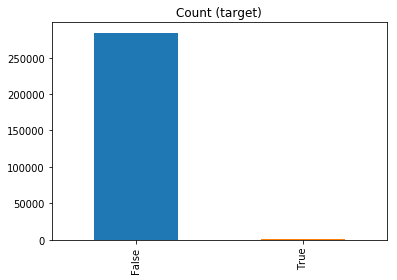

In [7]:
target_count = df['class'].value_counts()
print('False', target_count[0])
print('True', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [8]:
print(df.shape)
print(list(df.columns))

(284807, 32)
['column_a', 'time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount', 'class']


In [9]:
X_under = df[['v1','v2','v3','v4','v5','v6','v7','v9','v10','v11','v12','v14','v16','v17','v18','v19','v21']]
y_under = df['class']

In [10]:
# Class count
count_class_0, count_class_1 =  df['class'].value_counts()

# Divide by class
df_class_0 = df[df['class'] == 0]
df_class_1 = df[df['class'] == 1]

Random under-sampling:
True     492
False    492
Name: class, dtype: int64


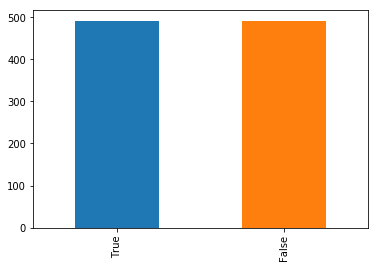

In [11]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under['class'].value_counts())

df_test_under['class'].value_counts().plot(kind='bar');

In [12]:
df_test_under

,column_a,time,v1,v2,v3,v4,v5,v6,v7,v8,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
145982,145983,87325,-0.522959,0.514183,0.759066,-0.825695,1.559120,-0.711280,1.107510,-0.389126,...,0.186932,0.617775,-0.574634,0.527807,1.231962,-0.022493,-0.259721,-0.281223,5.31,False
81306,81307,58879,-1.049001,0.905915,1.736568,-0.372618,0.328794,-1.098633,0.848846,-0.121852,...,-0.240086,-0.802452,0.026040,0.319830,0.246548,0.011891,-0.114802,0.049967,4.49,False
14495,14496,25679,-0.597171,1.172138,1.240775,-0.200337,0.068817,-0.640524,0.648011,0.008802,...,-0.298119,-0.755344,-0.065817,-0.153784,-0.095780,0.108748,0.367188,0.174677,2.67,False
237683,237684,149348,2.048629,-0.367489,-2.544065,-0.728472,2.387380,3.318407,-0.477692,0.791276,...,-0.292703,-0.835377,0.380780,0.698235,-0.265199,0.219159,-0.052337,-0.066750,1.98,False
145514,145515,87011,1.638419,-0.844575,-1.113887,0.527507,-0.295653,-0.272770,0.004666,-0.078755,...,0.109622,0.017436,0.001782,-0.438028,-0.265732,0.216872,-0.076843,-0.035285,194.90,False
24419,24420,33225,-0.690200,1.210546,0.067327,-0.680042,3.161079,3.769755,0.925114,-1.051759,...,0.535807,0.007547,-0.257590,0.981648,-0.073585,-0.454589,-0.424458,-0.771901,7.36,False
224019,224020,143620,0.023214,0.740050,0.128807,-0.795216,0.613403,-0.506585,0.829220,0.038881,...,-0.239524,-0.577737,0.022761,-0.496058,-0.510181,0.153546,0.240806,0.080708,2.58,False
135550,135551,81303,-0.246903,0.218956,0.957073,-1.322780,-0.214482,-1.165794,0.455963,-0.143774,...,0.369187,0.859761,-0.199797,0.543930,-0.076029,-0.204069,0.087066,0.121001,15.00,False
141605,141606,84421,0.985270,-0.479222,1.548147,1.633834,-1.158227,0.916763,-1.056400,0.563588,...,0.134397,0.744239,-0.127194,0.256035,0.509807,-0.121051,0.092773,0.021348,24.50,False
50506,50507,44520,1.043949,0.154749,0.170868,0.904327,0.561380,1.081338,-0.087798,0.347678,...,0.154681,0.642106,0.017846,-0.946961,0.380924,-0.201281,0.085707,0.007481,11.74,False


In [13]:
df['class'].dtype

dtype('bool')

In [14]:
X_under = df_test_under[['v1','v2','v3','v4','v5','v6','v7','v9','v10','v11','v12','v14','v16','v17','v18','v19','v21']]
y_under = df_test_under['class']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)

In [15]:
from tpot import TPOTClassifier

C:\Users\Komal\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
C:\Users\Komal\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [16]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_under_train ,  y_under_train)  
print(tpot.score(X_under_test, y_under_test))

C:\Users\Komal\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Generation 1 - Current best internal CV score: 0.9404739236221304
Generation 2 - Current best internal CV score: 0.9433618956944885
Generation 3 - Current best internal CV score: 0.9462604464191262
Generation 4 - Current best internal CV score: 0.9462604464191262
Generation 5 - Current best internal CV score: 0.9462604464191262

Best pipeline: LogisticRegression(RandomForestClassifier(GaussianNB(input_matrix), bootstrap=True, criterion=gini, max_features=0.7500000000000001, min_samples_leaf=9, min_samples_split=7, n_estimators=100), C=0.5, dual=True, penalty=l2)
0.9324324324324325
